In [102]:
import numpy as np
import pandas as pd
import re
import xml.etree.ElementTree as ET
from sklearn.utils import shuffle
import gensim 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
from scipy import spatial
from sklearn.decomposition import PCA
import itertools
import numpy as np
from scipy import spatial
from scipy.stats import norm
import nltk.data
from multiprocessing import Pool
from keras.layers import Input, Dense, Lambda, Layer
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras import backend as K
from gensim.models import Word2Vec
from keras import metrics
warnings.filterwarnings("ignore")

In [2]:
def readtags(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = description.text
        try:
            p=p.replace('\t','')
            p=p.replace('\n','')
            p = p.replace('.','')
            p = re.sub("\s\s+" , " ", p)
        except:
            pass
        name.append(p)
    return name

In [3]:
f = open('languages/Tamil.txt', 'r+', encoding="utf8")
tamil = f.readlines()
tamil = tamil[:31102]
tamil[0]= tamil[0].strip('\ufeffMMA')
import string
etamilclude = set(string.punctuation)
for i in range(0,len(tamil)):
    tamil[i] = tamil[i].strip('\n')
    tamil[i] = ''.join(ch for ch in tamil[i] if ch not in etamilclude)

In [6]:
chinese = readtags('Languages/Chinese.xml')
greek = readtags('Languages/Greek.xml')
sanskrit  = readtags('Languages/Hindi.xml')
latin = readtags('Languages/Latin.xml')
hebrew = readtags('Languages/Hebrew.xml')
arabic = readtags('Languages/Arabic.xml')

In [10]:
print(tamil[0])
print(arabic[0])
print(latin[0])
print(chinese[0])
print(greek[0])
print(hebrew[0])
print(sanskrit[0])

 கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத் சென்ற மாதம் பின்வருமாறு அறிவித்தார் நாங்கள் தீவிரவாதிகள் அல்ல
في البدء خلق الله السموات والارض
in principio creavit Deus caelum et terram
起初 神 創造 天地
Εν αρχη εποιησεν ο Θεος τον ουρανον και την γην
בראשית ברא אלהים את השמים ואת הארץ׃
आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।


In [38]:
lan = ["tamil"] * len(tamil)
data_1 = pd.DataFrame({"Text": tamil,"Language": lan})
lan = ["arabic"] * len(arabic)
data_2 = pd.DataFrame({"Text": arabic,"Language": lan})
lan = ["latin"] * len(latin)
data_3 = pd.DataFrame({"Text": latin,"Language": lan})
lan = ["chinese"] * len(chinese)
data_4 = pd.DataFrame({"Text": chinese,"Language": lan})
lan = ["greek"] * len(greek)
data_5 = pd.DataFrame({"Text": greek,"Language": lan})
lan = ["hebrew"] * len(hebrew)
data_6 = pd.DataFrame({"Text": hebrew,"Language": lan})
lan = ["sanskrit"] * len(sanskrit)
data_7 = pd.DataFrame({"Text": sanskrit,"Language": lan})

data = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7], ignore_index=True)

In [52]:
data['Language'][:10000].value_counts()

greek       1452
sanskrit    1448
arabic      1433
latin       1429
tamil       1428
chinese     1424
hebrew      1386
Name: Language, dtype: int64

In [40]:
data = shuffle(data)

In [56]:
l = data['Text']

In [41]:
data.head()

,Language,Text
194542,sanskrit,"शाऊल ने कहा, यहोवा की आशीष तुम पर हो, क्योंकि ..."
1066,tamil,ஜனாதிபதி ஆசிப் அலி ஜர்தாரியின் பாக்கிஸ்தானிய அ...
217190,sanskrit,जिन के द्वारा उस ने हमें बहुमूल्य और बहुत ही ब...
141383,greek,Ο αχρειος ανθρωπος σκαπτει κακον και εις τα χε...
17399,tamil,ஜனாதிபதியும் ஏனைய அரசியல்வாதிகளும் நாட்டை காப்...


In [72]:
tamil[0]

' கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத் சென்ற மாதம் பின்வருமாறு அறிவித்தார் நாங்கள் தீவிரவாதிகள் அல்ல'

In [105]:
##### TFIDF VECTORIZER
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text'][:1000])
words = vectorizer.get_feature_names()
print("words", words[:10])

words ['028', '1000', '1000ற', '110', '19', '1991', '1992ல', '2003', '2005', '2006ல']


In [142]:
X.shape

(1000, 6831)

In [135]:
X.shape

(1000, 6831)

In [106]:
dense = X.toarray()

In [107]:
len(dense)

1000

In [108]:
import umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(dense)

In [109]:
df = pd.DataFrame(embedding, columns=('x', 'y'))

In [110]:
labels = list(data['Language'][:1000])

In [111]:
df['class'] = labels

In [112]:
df.head()

,x,y,class
0,7.677217,1.659613,sanskrit
1,11.874664,-4.122683,tamil
2,6.771089,3.917198,sanskrit
3,-12.090248,3.084249,greek
4,10.673591,-5.424447,tamil


## COUNT embedding

<Figure size 864x864 with 0 Axes>

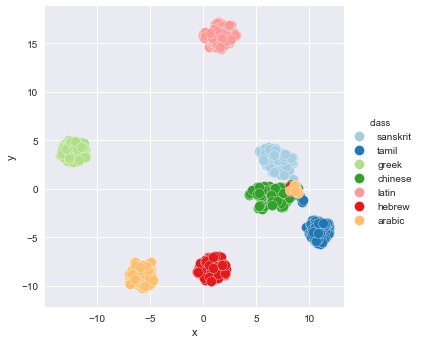

In [134]:
with sns.color_palette("Blues_d"):
    plt.figure(figsize=(12,12))
    sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",palette = 'Paired',size=5, plot_kws={"s": 100});
    plt.show()

## TFIDF Embedding

<Figure size 864x864 with 0 Axes>

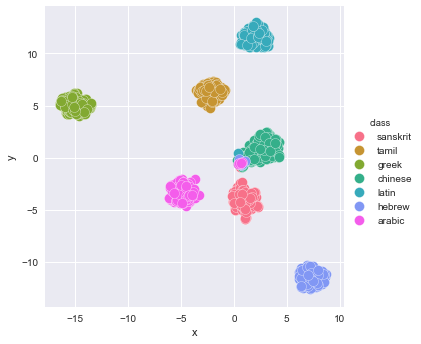

In [90]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=5, plot_kws={"s": 100});
plt.show()